In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
import pandas as pd

path = "/content/drive/My Drive/fire_predict/base_data/"
df_train = pd.read_csv(path + "PJT002_train.csv")
df_val = pd.read_csv(path + "PJT002_validation.csv")
df_test = pd.read_csv(path + "PJT002_test.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,172,173,174,175,176,177,178,179) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## 날짜를 년도만

In [0]:
def year(x):
    if x != "NaN":
        if isinstance(x, float):
            if not math.isnan(x):
                if int(x) >10000000:
                    return x // 10000
                elif int(x) > 1000000:
                    return x // 1000
                elif int(x) > 100000:
                    return x // 100
                elif int(x) > 10000:
                    return x // 10
                elif int(x) > 1000:
                    return x
        elif isinstance(x, str):
            return int(x[:4])

In [0]:
import numpy as np
import math


df_train["dt_of_athrztn"] = df_train["dt_of_athrztn"].apply(year)

In [4]:
df_train

,dt_of_fr,fr_yn,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,ttl_dwn_flr,bldng_us_clssfctn,tmprtr,prcpttn,wnd_spd,wnd_drctn,hmdt,gas_engry_us_201401,ele_engry_us_201401,gas_engry_us_201402,ele_engry_us_201402,gas_engry_us_201403,ele_engry_us_201403,gas_engry_us_201404,ele_engry_us_201404,gas_engry_us_201405,ele_engry_us_201405,gas_engry_us_201406,ele_engry_us_201406,gas_engry_us_201407,ele_engry_us_201407,gas_engry_us_201408,ele_engry_us_201408,gas_engry_us_201409,ele_engry_us_201409,gas_engry_us_201410,ele_engry_us_201410,gas_engry_us_201411,ele_engry_us_201411,gas_engry_us_201412,...,lw_13101211,lw_13101310,lw_13101410,lw_13111010,lw_13111110,lw_13121010,lw_13121011,lw_13131010,lw_13131110,lw_13141010,lw_13141011,jmk,id,rgnl_ar_nm,rgnl_ar_nm2,lnd_us_sttn_nm,rd_sd_nm,emd_nm,hm_cnt,fr_sttn_dstnc,bldng_ar_prc,fr_wthr_fclt_dstnc,fr_mn_cnt,mlt_us_yn,cctv_dstnc,fr_wthr_fclt_in_100m,cctv_in_100m,tbc_rtl_str_dstnc,sft_emrgnc_bll_dstnc,ahsm_dstnc,no_tbc_zn_dstnc,bldng_cnt_in_50m,trgt_crtr,fr_fghtng_fclt_spcl_css_5_yn,fr_fghtng_fclt_spcl_css_6_yn,us_yn,dngrs_thng_yn,slf_fr_brgd_yn,blk_dngrs_thng_mnfctr_yn,cltrl_hrtg_yn
0,2017-10-20 05:54:00,Y,단독주택,블록구조,3,69.420,69.4200,0.0,1977.0,1.0,0.0,주거용,10.7,NaN,0.9,200.0,96.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,대,106536,자연녹지지역,지정되지않음,단독,세로한면(불),경상남도 창녕군 창녕읍,17360.0,4547,NaN,133,137.0,N,112,0,0,1891,29231,11322,88,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-09-30 08:26:15,N,NaN,NaN,3,46.290,46.2900,0.0,NaN,1.0,0.0,NaN,19.5,NaN,0.5,20.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,대,86366,계획관리지역,지정되지않음,단독,세로한면(가),경상남도 의령군 가례면,1791.0,6388,122581.0,489,85.0,N,818,0,0,4533,20480,3369,7727,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-10-30 14:57:00,Y,공동주택,철근콘크리트구조,1,583.800,2516.7600,1446.0,2000.0,5.0,0.0,주거용,15.5,NaN,2.0,90.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,답,107560,제2종일반주거지역,지정되지않음,연립,중로한면,경상남도 창녕군 창녕읍,17285.0,3340,618105.0,143,137.0,N,165,0,0,277,31197,12451,72,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-06-14 05:23:58,N,단독주택,일반목구조,2,48.920,48.9200,0.0,1936.0,1.0,0.0,주거용,20.6,NaN,0.4,0.0,91.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,대,97550,제1종일반주거지역,지정되지않음,단독,세로한면(불),경상남도 창원시의창구 대산면,7327.0,179,719542.0,1585,176.0,N,131,0,0,438,4270,407,508,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-04-22 05:38:59,N,NaN,NaN,2,0.000,0.0000,0.0,NaN,NaN,NaN,NaN,12.7,NaN,0.6,360.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,임,130501,자연환경보전지역,지정되지않음,자연림,세로한면(불),경상남도 창녕군 창녕읍,17278.0,4822,NaN,603,137.0,N,686,0,0,1702,29778,12487,707,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59194,2016-12-03 14:25:35,N,동.식물 관련시설,경량철골구조,2,423.000,423.0000,3010.0,1996.0,NaN,NaN,NaN,11.2,NaN,0.2,0.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,목,91817,계획관리지역,지정되지않음,주거기타,세로한면(가),경상남도 함안군 칠원읍,20955.0,3435,NaN,895,139.0,N,1131,0,0,3591,3624,6679,914,0,일반대상물,N,N,Y,N,N,N,N
59195,2016-10-29 10:10:00,N,NaN,NaN,35,5593.711,54835.0382,0.0,NaN,171.0,0.0,NaN,14.8,NaN,1.9,20.0,72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
df_val

,dt_of_fr,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,ttl_dwn_flr,bldng_us_clssfctn,tmprtr,prcpttn,wnd_spd,wnd_drctn,hmdt,gas_engry_us_201401,ele_engry_us_201401,gas_engry_us_201402,ele_engry_us_201402,gas_engry_us_201403,ele_engry_us_201403,gas_engry_us_201404,ele_engry_us_201404,gas_engry_us_201405,ele_engry_us_201405,gas_engry_us_201406,ele_engry_us_201406,gas_engry_us_201407,ele_engry_us_201407,gas_engry_us_201408,ele_engry_us_201408,gas_engry_us_201409,ele_engry_us_201409,gas_engry_us_201410,ele_engry_us_201410,gas_engry_us_201411,ele_engry_us_201411,gas_engry_us_201412,ele_engry_us_201412,...,lw_13101310,lw_13101410,lw_13111010,lw_13111110,lw_13121010,lw_13121011,lw_13131010,lw_13131110,lw_13141010,lw_13141011,jmk,id,rgnl_ar_nm,rgnl_ar_nm2,lnd_us_sttn_nm,rd_sd_nm,emd_nm,hm_cnt,fr_sttn_dstnc,bldng_ar_prc,fr_wthr_fclt_dstnc,fr_mn_cnt,mlt_us_yn,cctv_dstnc,fr_wthr_fclt_in_100m,cctv_in_100m,tbc_rtl_str_dstnc,sft_emrgnc_bll_dstnc,ahsm_dstnc,no_tbc_zn_dstnc,bldng_cnt_in_50m,trgt_crtr,fr_fghtng_fclt_spcl_css_5_yn,fr_fghtng_fclt_spcl_css_6_yn,us_yn,dngrs_thng_yn,slf_fr_brgd_yn,blk_dngrs_thng_mnfctr_yn,cltrl_hrtg_yn,fr_yn
0,2017-06-12 22:16:11,단독주택,블록구조,2,77.13,77.13,485.00,19861031.0,1.0,0.0,주거용,16.7,NaN,1.6,110.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,대,83128,계획관리지역,지정되지않음,단독,중로한면,경상남도 김해시 한림면,8686.0,4094,1095890.0,131,178.0,N,735,0,0,1314,6516,10650,754,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,2016-09-09 05:09:51,NaN,NaN,1,105.43,98.59,315.00,NaN,1.0,0.0,NaN,20.3,NaN,0.9,110.0,96.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,대,127575,계획관리지역,지정되지않음,단독,세로한면(가),경상남도 김해시 진례면,7776.0,2749,1196876.0,323,178.0,N,430,0,0,2197,3510,8179,804,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2017-01-31 21:30:24,단독주택,철근콘크리트구조,1,117.80,290.43,196.70,20060811.0,3.0,0.0,주거용,2.1,NaN,1.2,320.0,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,대,132273,제1종일반주거지역,지정되지않음,주상용,소로한면,경상남도 김해시 내외동,82924.0,784,1129360.0,127,201.0,N,126,0,0,158,208,17229,179,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
3,2016-01-14 16:08:00,공장,일반철골구조,1,336.00,336.00,1360.00,20000626.0,1.0,0.0,공업용,6.2,NaN,3.4,290.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,장,73301,계획관리지역,지정되지않음,공업용,중로한면,경상남도 김해시 진영읍,45446.0,4277,NaN,2,178.0,N,250,2,0,186,4167,7589,3279,1,일반대상물,NaN,NaN,Y,N,N,N,N,Y
4,2018-10-22 22:00:06,단독주택,벽돌구조,3,251.02,250.45,840.00,19940124.0,1.0,0.0,주거용,15.8,NaN,0.8,360.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,대,97438,제2종일반주거지역,지정되지않음,공업용,세로한면(가),경상남도 김해시 주촌면,6382.0,3479,904202.0,413,178.0,N,339,0,0,411,3307,13651,423,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6893,2017-11-09 17:00:57,NaN,NaN,1,0.00,0.00,0.00,NaN,NaN,NaN,NaN,15.5,NaN,1.4,180.0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,대,107540,제2종일반주거지역,지정되지않음,단독,세로한면(불),경상남도 김해시 칠산서부동,10068.0,3789,1288416.0,137,201.0,N,214,0,0,157,283,11358,256,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
6894,2014-03-25 16:52:56,제2종근린생활시설,철근콘크리트구조,1,186.00,340.74,945.00,20070221.0,2.0,0.0,상업용,13.9,NaN,1.9,110.0,85.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,N

In [6]:
df_test

,dt_of_fr,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,ttl_dwn_flr,bldng_us_clssfctn,tmprtr,prcpttn,wnd_spd,wnd_drctn,hmdt,gas_engry_us_201401,ele_engry_us_201401,gas_engry_us_201402,ele_engry_us_201402,gas_engry_us_201403,ele_engry_us_201403,gas_engry_us_201404,ele_engry_us_201404,gas_engry_us_201405,ele_engry_us_201405,gas_engry_us_201406,ele_engry_us_201406,gas_engry_us_201407,ele_engry_us_201407,gas_engry_us_201408,ele_engry_us_201408,gas_engry_us_201409,ele_engry_us_201409,gas_engry_us_201410,ele_engry_us_201410,gas_engry_us_201411,ele_engry_us_201411,gas_engry_us_201412,ele_engry_us_201412,...,lw_13101310,lw_13101410,lw_13111010,lw_13111110,lw_13121010,lw_13121011,lw_13131010,lw_13131110,lw_13141010,lw_13141011,jmk,id,rgnl_ar_nm,rgnl_ar_nm2,lnd_us_sttn_nm,rd_sd_nm,emd_nm,hm_cnt,fr_sttn_dstnc,bldng_ar_prc,fr_wthr_fclt_dstnc,fr_mn_cnt,mlt_us_yn,cctv_dstnc,fr_wthr_fclt_in_100m,cctv_in_100m,tbc_rtl_str_dstnc,sft_emrgnc_bll_dstnc,ahsm_dstnc,no_tbc_zn_dstnc,bldng_cnt_in_50m,trgt_crtr,fr_fghtng_fclt_spcl_css_5_yn,fr_fghtng_fclt_spcl_css_6_yn,us_yn,dngrs_thng_yn,slf_fr_brgd_yn,blk_dngrs_thng_mnfctr_yn,cltrl_hrtg_yn,fr_yn
0,2016-02-03 15:28:24,NaN,NaN,3,0.00,0.00,0.0,NaN,NaN,NaN,NaN,6.6,NaN,4.5,290.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,제,116766,NaN,NaN,NaN,NaN,경상남도 김해시 대동면,7235.0,3742,NaN,107,201.0,N,148,0,0,1352,10775,32295,1203,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-03-17 18:25:31,공장,일반철골구조,2,915.75,903.75,2660.0,20011228.0,1.0,0.0,공업용,13.8,NaN,2.2,110.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,장,120945,계획관리지역,지정되지않음,공업용,소로한면,경상남도 김해시 생림면,4198.0,3740,NaN,292,201.0,N,281,0,0,1292,3225,18413,3572,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-12-03 06:51:43,NaN,NaN,5,5523.87,9888.87,13607.0,NaN,9.0,0.0,NaN,12.9,6.5,2.2,320.0,97.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,장,105476,준공업지역,지정되지않음,공업용,세로한면(가),경상남도 김해시 진영읍,54354.0,1134,NaN,48,178.0,N,353,1,0,924,1261,4903,561,1,NaN,N,N,N,N,N,N,N,NaN
3,2015-03-29 23:37:16,NaN,NaN,8,667.20,914.40,0.0,NaN,3.0,0.0,NaN,12.4,NaN,0.6,140.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,장,105148,일반공업지역,지정되지않음,공업용,세로한면(가),경상남도 김해시 진영읍,42217.0,2921,NaN,254,178.0,N,571,0,0,195,3111,5729,1829,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-05-17 11:08:02,NaN,NaN,7,1050.06,1050.33,0.0,NaN,3.0,0.0,NaN,22.0,NaN,4.6,290.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,대,98350,계획관리지역,지정되지않음,전기타,세로한면(가),경상남도 김해시 한림면,8886.0,2233,344255.0,93,178.0,N,560,0,0,3557,6103,8205,1833,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2952,2018-05-31 19:17:18,단독주택,철근콘크리트구조,1,122.45,329.55,288.0,20010828.0,3.0,0.0,주거용,20.3,NaN,2.6,200.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,대,132493,제1종일반주거지역,지정되지않음,다세대,세로한면(가),경상남도 김해시 내외동,79708.0,1150,1119709.0,56,201.0,N,66,1,1,321,164,16240,183,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2953,2014-10-17 18:20:58,NaN,NaN,4,52.89,52.89,0.0,NaN,1.0,0.0,NaN,16.7,NaN,1.6,110.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,대,129209,계획관리지역,지정

In [7]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     \ 5.4MB 427kB/s
  Created wheel for pandas-profiling: filename=pandas_profiling-2.3.0-py2.py3-none-any.whl size=144604 sha256=e952d815fb4db2032dff4159955d101f0e8630416e8382033be16b2976cd4faf
  Stored in directory: /tmp/pip-ephem-wheel-cache-qzakqizo/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
Successfully built pandas-profiling


In [10]:
import pandas_profiling as pp


df_2 = df_train.drop(list(df_train.iloc[:, 17:137].columns), axis=1)
pr=df_2.profile_report()

/usr/local/lib/python3.6/dist-packages/pandas_profiling/model/correlations.py:34: RuntimeWarning: invalid value encountered in double_scalars
  return np.sqrt(phi2corr / min((kcorr - 1.0), (rcorr - 1.0)))
/usr/local/lib/python3.6/dist-packages/pandas_profiling/model/correlations.py:124: UserWarning: There was an attempt to calculate the cramers correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"cramers": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/pandas-profiling/pandas-profiling/issues
(include the error message: 'The internally computed table of expected frequencies has a zero element at (0, 16).')
  correlation_name=correlation_name, error=error


In [0]:
pr

In [0]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59199 entries, 0 to 59198
Data columns (total 52 columns):
id                      59199 non-null int64
dt_of_fr                59199 non-null object
bldng_us                31522 non-null object
bldng_archtctr          31534 non-null object
bldng_cnt               59199 non-null int64
bldng_ar                59199 non-null float64
ttl_ar                  59199 non-null float64
lnd_ar                  59199 non-null float64
dt_of_athrztn           31618 non-null float64
ttl_grnd_flr            48989 non-null float64
ttl_dwn_flr             48194 non-null float64
bldng_us_clssfctn       29856 non-null object
tmprtr                  59186 non-null float64
prcpttn                 5570 non-null float64
wnd_spd                 59166 non-null float64
wnd_drctn               58978 non-null float64
hmdt                    59177 non-null float64
lw_13101010             302 non-null float64
lw_13101110             291 non-null float64
lw_13101210

In [0]:
df_train.describe()

,id,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,ttl_dwn_flr,tmprtr,prcpttn,wnd_spd,wnd_drctn,hmdt,lw_13101010,lw_13101110,lw_13101210,lw_13101211,lw_13101310,lw_13101410,lw_13111010,lw_13111110,lw_13121010,lw_13121011,lw_13131010,lw_13131110,lw_13141010,lw_13141011,hm_cnt,fr_sttn_dstnc,bldng_ar_prc,fr_wthr_fclt_dstnc,fr_mn_cnt,cctv_dstnc,cctv_in_100m,fr_wthr_fclt_in_100m,tbc_rtl_str_dstnc,sft_emrgnc_bll_dstnc,ahsm_dstnc,no_tbc_zn_dstnc,bldng_cnt_in_50m
count,59199.000000,59199.000000,59199.000000,5.919900e+04,5.919900e+04,31618.000000,48989.000000,48194.000000,59186.000000,5570.000000,59166.000000,58978.000000,59177.000000,302.000000,291.000000,297.000000,298.000000,292.000000,283.000000,300.000000,281.000000,273.000000,273.000000,296.000000,296.000000,292.000000,291.000000,58498.000000,59199.000000,3.730400e+04,59199.000000,59158.000000,59199.000000,59199.000000,59199.000000,59199.000000,59199.000000,59199.000000,59199.000000,59199.000000
mean,103558.889947,3.453927,633.562740,2.477958e+03,2.900026e+04,1986.143716,3.193145,0.132465,14.015632,1.722208,1.535399,159.750432,65.847559,3.465472,3.132913,3.528796,3.456091,3.316866,1.692830,3.710709,1.653641,0.407825,0.392645,2.930050,2.930050,2.706786,2.778253,10921.538446,5738.526377,6.397596e+05,1910.026875,151.219311,760.094917,0.415480,0.246119,3253.293383,31396.045626,8974.286964,1146.474636,3.815200
std,19921.311548,7.220839,9211.774472,7.831936e+04,2.157306e+06,111.179694,16.300922,1.001652,9.785721,3.989392,1.298130,125.751929,23.509869,0.582903,1.275118,0.701813,0.967121,1.142484,1.615795,0.680250,1.746556,1.077494,1.039508,1.219182,1.219182,1.515533,1.489912,12858.178956,4908.276434,4.938297e+05,2638.501511,36.763184,1337.103386,1.176513,0.608620,3329.985798,24248.943785,11377.904356,1671.199571,8.410348
min,69056.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,1646.000000,0.000000,0.000000,-14.100000,0.000000,0.000000,0.000000,0.000000,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,778.000000,4.000000,1.753700e+04,0.000000,85.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,86303.500000,1.000000,46.280000,5.055000e+01,0.000000e+00,1973.000000,1.000000,0.000000,6.100000,0.000000,0.600000,20.000000,48.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000,3.476667,0.000000,0.000000,0.000000,2.736842,2.736842,2.073158,2.468750,2880.000000,1651.000000,2.748650e+05,114.000000,112.000000,100.000000,0.000000,0.000000,527.000000,11229.000000,761.000000,115.000000,0.000000
50%,103561.000000,2.000000,87.730000,9.720000e+01,1.600000e+02,1993.000000,1.000000,0.000000,14.700000,0.400000,1.200000,160.000000,68.000000,3.500000,3.500000,4.000000,4.000000,4.000000,2.000000,4.000000,0.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,5740.000000,4444.000000,5.505175e+05,643.000000,161.000000,288.000000,0.000000,0.000000,2184.000000,27037.000000,3210.000000,422.000000,0.000000
75%,120781.500000,4.000000,155.100000,2.144150e+02,4.460000e+02,2003.000000,2.000000,0.000000,22.000000,1.500000,2.200000,270.000000,87.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.409091,0.000000,0.000000,4.000000,4.000000,4.000000,4.000000,13501.000000,8603.000000,8.643792e+05,2494.000000,176.000000,889.000000,0.000000,0.000000,4958.000000,45713.000000,14239.500000,1486.500000,3.000000
max,138108.000000,705.000000,572897.955000,1.235184e+07,2.038984e+08,9990.000000,594.000000,60.000000,38.100000,93.000000,15.300000,360.000000,100.000000,5.000000,5.000000,6.000000,5.500000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,115081.000000,38044.000000,1.568930e+07,17716.000000,210.000000,12278.000000,24.000000,10.000000,23228.000000,103571.000000,56485.000000,16164.000000,84.000000


In [0]:
df_train = df_train.drop("id", axis=1)

In [0]:
df_train

,dt_of_fr,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,ttl_dwn_flr,bldng_us_clssfctn,tmprtr,prcpttn,wnd_spd,wnd_drctn,hmdt,lw_13101010,lw_13101110,lw_13101210,lw_13101211,lw_13101310,lw_13101410,lw_13111010,lw_13111110,lw_13121010,lw_13121011,lw_13131010,lw_13131110,lw_13141010,lw_13141011,jmk,rgnl_ar_nm,rgnl_ar_nm2,lnd_us_sttn_nm,rd_sd_nm,emd_nm,hm_cnt,fr_sttn_dstnc,bldng_ar_prc,fr_wthr_fclt_dstnc,fr_mn_cnt,mlt_us_yn,cctv_dstnc,cctv_in_100m,fr_wthr_fclt_in_100m,tbc_rtl_str_dstnc,sft_emrgnc_bll_dstnc,ahsm_dstnc,no_tbc_zn_dstnc,bldng_cnt_in_50m,fr_yn
0,2015-10-03 02:33:46,NaN,NaN,3,112.86,112.86,200.0,NaN,1.0,0.0,NaN,15.8,NaN,1.6,360.0,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,대,자연녹지지역,지정되지않음,단독,세로한면(불),경상남도 통영시 용남면,11613.0,1727,478038.0,609,161.0,N,129,0,0,809,2453,17664,83,0,N
1,2016-11-13 17:05:57,업무시설,철근콘크리트구조,3,721.82,1109.54,0.0,1988.0,5.0,0.0,공공용,15.6,NaN,1.3,20.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,대,제2종일반주거지역,지정되지않음,업무용,중로한면,경상남도 통영시 용남면,13511.0,2659,NaN,79,161.0,N,27,5,1,1731,2561,18136,50,0,N
2,2016-11-21 12:46:36,단독주택,블록구조,4,47.06,47.06,288.0,1965.0,1.0,0.0,주거용,15.7,NaN,4.3,360.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,대,생산녹지지역,지정되지않음,단독,소로한면,경상남도 통영시 용남면,13511.0,4093,671829.0,259,161.0,N,273,0,0,825,3964,14944,270,1,N
3,2016-11-07 02:50:14,위험물저장및처리시설,벽돌구조,2,171.45,176.64,1379.0,2002.0,2.0,0.0,상업용,13.7,NaN,2.8,360.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,주,자연녹지지역,지정되지않음,상업용,중로한면,경상남도 통영시 용남면,13511.0,5931,NaN,103,161.0,N,109,0,0,1264,2572,15104,132,0,N
4,2014-01-28 16:36:43,NaN,NaN,4,0.00,0.00,0.0,NaN,NaN,NaN,NaN,10.4,NaN,4.7,320.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,대,계획관리지역,지정되지않음,단독,세로한면(가),경상남도 거창군 북상면,1646.0,10433,522466.0,8302,109.0,N,739,0,0,10241,100127,5000,5004,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59194,2016-09-22 10:36:21,단독주택,철근콘크리트구조,1,167.67,261.42,316.0,2000.0,2.0,0.0,주거용,19.9,0.0,3.1,360.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,대,제2종일반주거지역,지정되지않음,단독,소로한면,경상남도 통영시 용남면,13422.0,2809,609555.0,313,161.0,N,366,0,0,2105,2744,15409,160,3,N
59195,2017-08-19 17:09:00,NaN,NaN,2,57.38,57.38,711.0,NaN,1.0,0.0,NaN,27.4,NaN,2.2,140.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,대,자연녹지지역,지정되지않음,단독,세로한면(불),경상남도 통영시 용남면,13505.0,1719,721506.0,643,161.0,N,398,0,0,824,1805,18649,31,0,N
59196,2017-08-02 08:53:05,NaN,NaN,2,126.32,156.49,493.0,NaN,2.0,0.0,NaN,26.6,NaN,1.3,360.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,대,제1종일반주거지역,지정되지않음,단독,세로한면(가),경상남도 통영시 용남면,13505.0,3148,603872.0,48,161.0,N,196,0,1,1820,2899,14666,35,0,N
59197,2017-08-29 03:16:08,NaN,NaN,4,0.00,0.00,0.0,NaN,NaN,NaN,NaN,27.1,NaN,3.4,250.0,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,대,자연녹지지역,지정되지않음,공업용,세로한면(가),경상남도 통영시 용남면,13505.0,6030,NaN,297,161.0,N,198,0,0,1236,2573,14826,210,0,N


In [0]:
df_train = df_train.drop("dt_of_fr", axis=1)

In [0]:
df_train

,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,ttl_dwn_flr,bldng_us_clssfctn,tmprtr,prcpttn,wnd_spd,wnd_drctn,hmdt,lw_13101010,lw_13101110,lw_13101210,lw_13101211,lw_13101310,lw_13101410,lw_13111010,lw_13111110,lw_13121010,lw_13121011,lw_13131010,lw_13131110,lw_13141010,lw_13141011,jmk,rgnl_ar_nm,rgnl_ar_nm2,lnd_us_sttn_nm,rd_sd_nm,emd_nm,hm_cnt,fr_sttn_dstnc,bldng_ar_prc,fr_wthr_fclt_dstnc,fr_mn_cnt,mlt_us_yn,cctv_dstnc,cctv_in_100m,fr_wthr_fclt_in_100m,tbc_rtl_str_dstnc,sft_emrgnc_bll_dstnc,ahsm_dstnc,no_tbc_zn_dstnc,bldng_cnt_in_50m,fr_yn
0,NaN,NaN,3,112.86,112.86,200.0,NaN,1.0,0.0,NaN,15.8,NaN,1.6,360.0,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,대,자연녹지지역,지정되지않음,단독,세로한면(불),경상남도 통영시 용남면,11613.0,1727,478038.0,609,161.0,N,129,0,0,809,2453,17664,83,0,N
1,업무시설,철근콘크리트구조,3,721.82,1109.54,0.0,1988.0,5.0,0.0,공공용,15.6,NaN,1.3,20.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,대,제2종일반주거지역,지정되지않음,업무용,중로한면,경상남도 통영시 용남면,13511.0,2659,NaN,79,161.0,N,27,5,1,1731,2561,18136,50,0,N
2,단독주택,블록구조,4,47.06,47.06,288.0,1965.0,1.0,0.0,주거용,15.7,NaN,4.3,360.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,대,생산녹지지역,지정되지않음,단독,소로한면,경상남도 통영시 용남면,13511.0,4093,671829.0,259,161.0,N,273,0,0,825,3964,14944,270,1,N
3,위험물저장및처리시설,벽돌구조,2,171.45,176.64,1379.0,2002.0,2.0,0.0,상업용,13.7,NaN,2.8,360.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,주,자연녹지지역,지정되지않음,상업용,중로한면,경상남도 통영시 용남면,13511.0,5931,NaN,103,161.0,N,109,0,0,1264,2572,15104,132,0,N
4,NaN,NaN,4,0.00,0.00,0.0,NaN,NaN,NaN,NaN,10.4,NaN,4.7,320.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,대,계획관리지역,지정되지않음,단독,세로한면(가),경상남도 거창군 북상면,1646.0,10433,522466.0,8302,109.0,N,739,0,0,10241,100127,5000,5004,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59194,단독주택,철근콘크리트구조,1,167.67,261.42,316.0,2000.0,2.0,0.0,주거용,19.9,0.0,3.1,360.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,대,제2종일반주거지역,지정되지않음,단독,소로한면,경상남도 통영시 용남면,13422.0,2809,609555.0,313,161.0,N,366,0,0,2105,2744,15409,160,3,N
59195,NaN,NaN,2,57.38,57.38,711.0,NaN,1.0,0.0,NaN,27.4,NaN,2.2,140.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,대,자연녹지지역,지정되지않음,단독,세로한면(불),경상남도 통영시 용남면,13505.0,1719,721506.0,643,161.0,N,398,0,0,824,1805,18649,31,0,N
59196,NaN,NaN,2,126.32,156.49,493.0,NaN,2.0,0.0,NaN,26.6,NaN,1.3,360.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,대,제1종일반주거지역,지정되지않음,단독,세로한면(가),경상남도 통영시 용남면,13505.0,3148,603872.0,48,161.0,N,196,0,1,1820,2899,14666,35,0,N
59197,NaN,NaN,4,0.00,0.00,0.0,NaN,NaN,NaN,NaN,27.1,NaN,3.4,250.0,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,대,자연녹지지역,지정되지않음,공업용,세로한면(가),경상남도 통영시 용남면,13505.0,6030,NaN,297,161.0,N,198,0,0,1236,2573,14826,210,0,N


In [0]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [0]:
from matplotlib import font_manager, rc
import matplotlib


matplotlib.rcParams['axes.unicode_minus'] = False
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = font_manager.FontProperties(fname=path, size=10).get_name()
print(font_name)
rc('font', family=font_name)
font_manager._rebuild()

NanumGothic Eco


# 건물용도

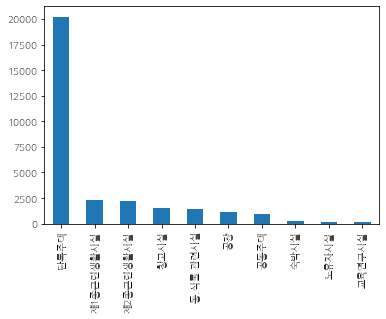

In [0]:
from matplotlib import pyplot as plt


fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(221)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)
df_train.iloc[:, 1].value_counts().head(10).plot(kind="bar", ax=ax)
df_train.iloc[:, 1][df_train["fr_yn"] == "Y"].value_counts().head(10).plot(kind="bar", ax=ax2)
df_train.iloc[:, 1][df_train["fr_yn"] == "N"].value_counts().head(10).plot(kind="bar", ax=ax3)
plt.show()

In [0]:
df_train['bldng_us'].unique()

array([nan, '업무시설', '단독주택', '위험물저장및처리시설', '공동주택', '제1종근린생활시설', '공장',
       '제2종근린생활시설', '노유자시설', '운동시설', '동.식물 관련시설', '창고시설', '의료시설', '위락시설',
       '자동차관련시설', '종교시설', '근린생활시설', '분뇨.쓰레기처리시설', '숙박시설', '교육연구시설',
       '발전시설', '관광휴게시설', '판매시설', '수련시설', '문화및집회시설', '묘지관련시설', '방송통신시설',
       '장례식장', '운수시설', '교정및군사시설', '교육연구및복지시설', '파출소', '판매및영업시설', '시장',
       '공공용시설'], dtype=object)

# 건물 구조

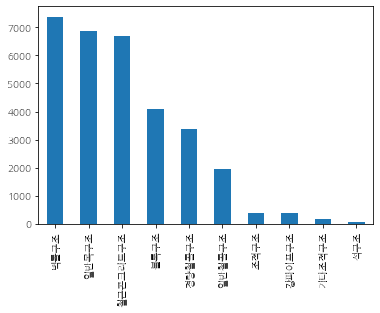

In [0]:
df_train.iloc[:,1].value_counts().head(10).plot.bar()

# 건물 채수

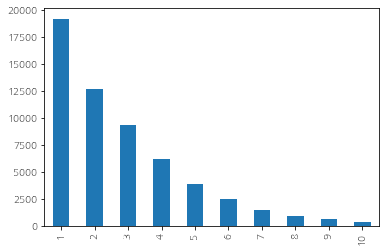

In [0]:
df_train.iloc[:,2].value_counts().head(10).plot.bar()

# 건물 건축 면적

{'boxes': [<matplotlib.lines.Line2D at 0x7f91ee95fe10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f91ee96f7f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f91ee979208>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f91ee96fe80>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f91ee96f160>,
  <matplotlib.lines.Line2D at 0x7f91ee96f4a8>]}

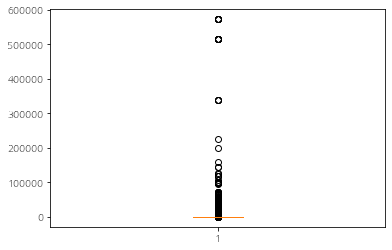

In [0]:
plt.boxplot(df_train.iloc[:,3])

# 건물연면적(건물층별합계전체 면적)

{'boxes': [<matplotlib.lines.Line2D at 0x7f91ee940860>],
 'caps': [<matplotlib.lines.Line2D at 0x7f91ee8cc0f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f91ee8ccac8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f91ee8cc780>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f91ee9409b0>,
  <matplotlib.lines.Line2D at 0x7f91ee940d68>]}

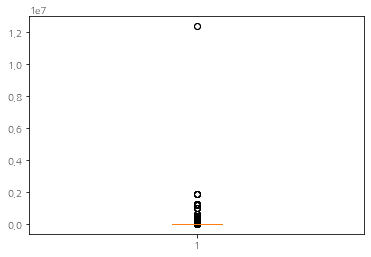

In [0]:
plt.boxplot(df_train.iloc[:,4])

# 토지면적

{'boxes': [<matplotlib.lines.Line2D at 0x7f91ee8a0940>],
 'caps': [<matplotlib.lines.Line2D at 0x7f91ee8ad1d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f91ee8adba8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f91ee8ad860>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f91ee8a0a90>,
  <matplotlib.lines.Line2D at 0x7f91ee8a0e48>]}

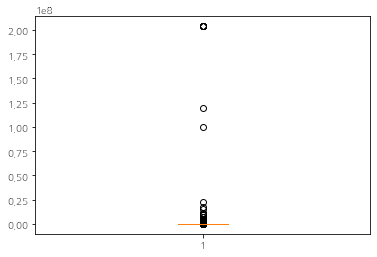

In [0]:
plt.boxplot(df_train.iloc[:,5])

# 건물승인일자

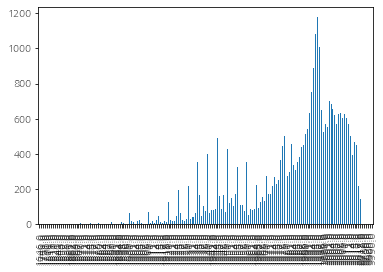

In [0]:
df_train.iloc[:,6].value_counts().sort_index().plot.bar()

# 건물들의 지상 층수의 합

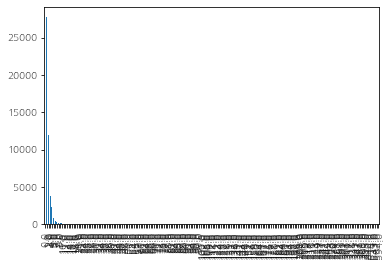

In [0]:
df_train.iloc[:,7].value_counts().sort_index().plot.bar()

# 건물들의 지하 층수의 합

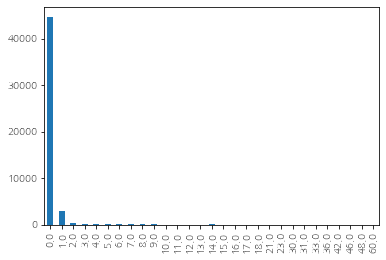

In [0]:
df_train.iloc[:,8].value_counts().sort_index().plot.bar()

# 건물용도분류명

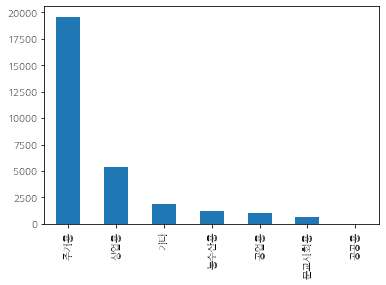

In [0]:
df_train.iloc[:,9].value_counts().head(10).plot.bar()

# 온도

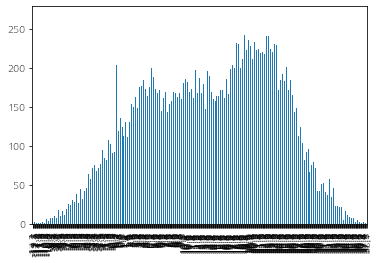

In [0]:
df_train.iloc[:,10].value_counts().sort_index().plot.bar()

# 강수량

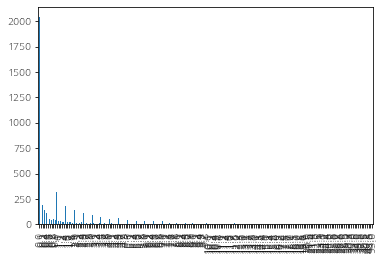

In [0]:
df_train.iloc[:,11].value_counts().sort_index().plot.bar()

# 풍속

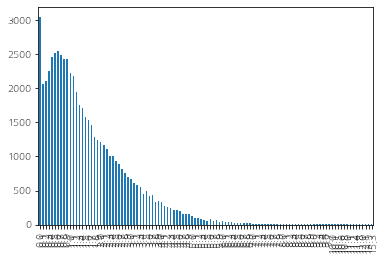

In [0]:
df_train.iloc[:,12].value_counts().sort_index().plot.bar()

# 풍량

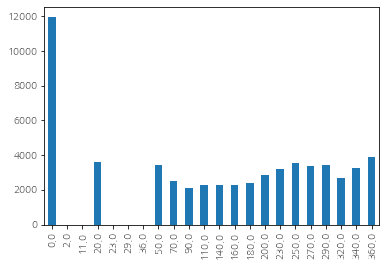

In [0]:
df_train.iloc[:,13].value_counts().sort_index().plot.bar()

# 습도

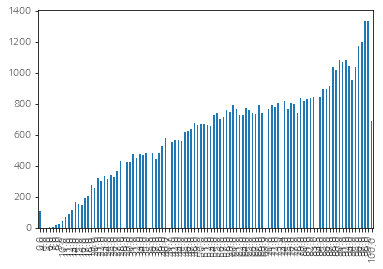

In [0]:
df_train.iloc[:,14].value_counts().sort_index().plot.bar()

# 복도, 계단, 출입구의 성능유지 여부

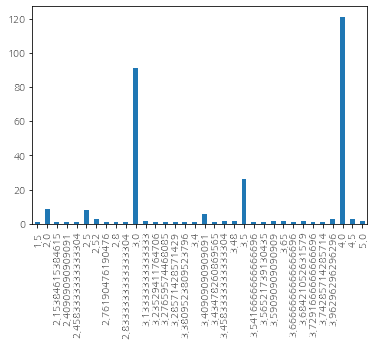

In [0]:
df_train.iloc[:,15].value_counts().sort_index().plot.bar()

# 옥상광장의 피난성능 유지여부

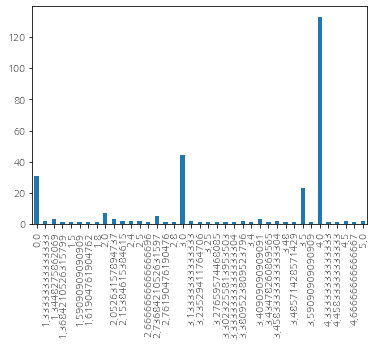

In [0]:
df_train.iloc[:,16].value_counts().sort_index().plot.bar()

# 방화문, 방화셔터 등의 성능 유지여부

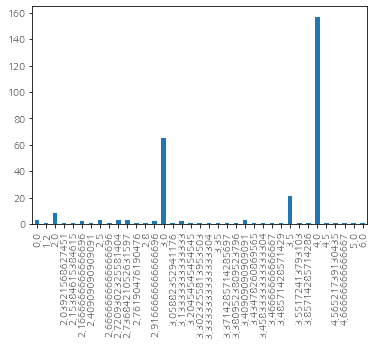

In [0]:
df_train.iloc[:,17].value_counts().sort_index().plot.bar()

# 경계벽 및 칸막이벽의 변경 등 방화성능 유지여부

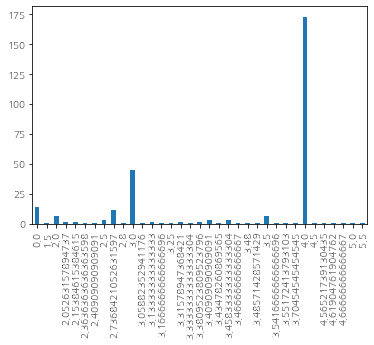

In [0]:
df_train.iloc[:,18].value_counts().sort_index().plot.bar()

# 배연설비의 성능 유지여부

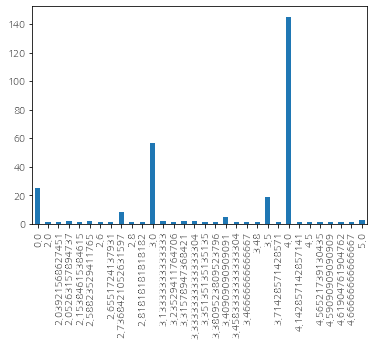

In [0]:
df_train.iloc[:,19].value_counts().sort_index().plot.bar()

# 배연설비의 성능 유지여부

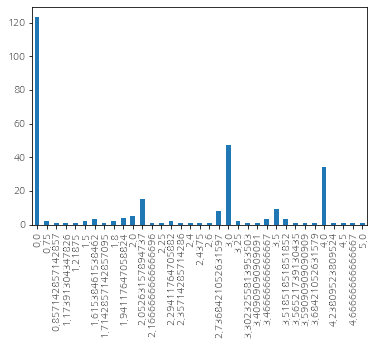

In [0]:
df_train.iloc[:,20].value_counts().sort_index().plot.bar()

# 내화구조의 성능 유지여부

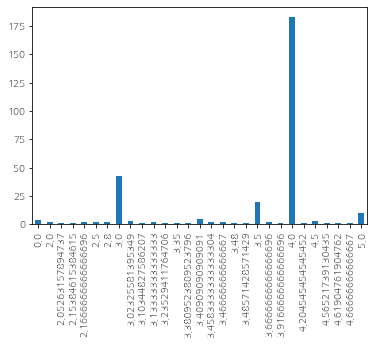

In [0]:
df_train.iloc[:,21].value_counts().sort_index().plot.bar()

# 방화벽의 성능 유지여부

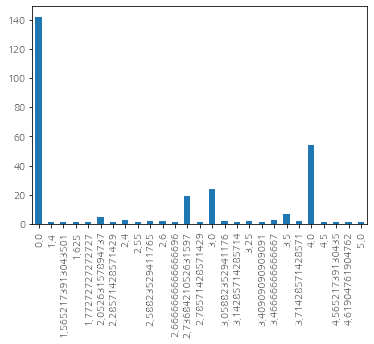

In [0]:
df_train.iloc[:,22].value_counts().sort_index().plot.bar()

# 외벽의 성능 유지여부

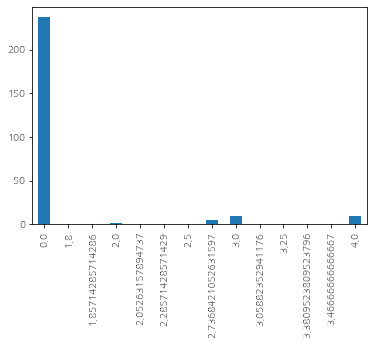

In [0]:
df_train.iloc[:,23].value_counts().sort_index().plot.bar()

# 창호의 성능 유지여부

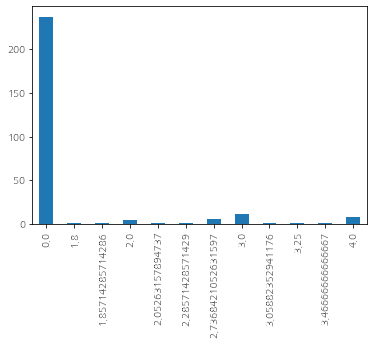

In [0]:
df_train.iloc[:,24].value_counts().sort_index().plot.bar()

# 내부마감의 방화성능 유지여부

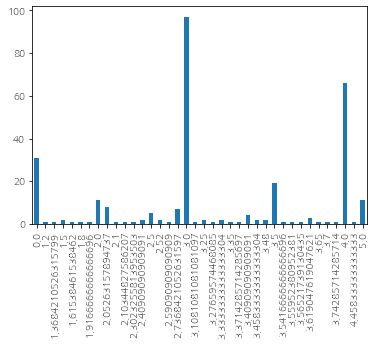

In [0]:
df_train.iloc[:,25].value_counts().sort_index().plot.bar()

# 외부마감의 노후화와 마감재 탈락여부

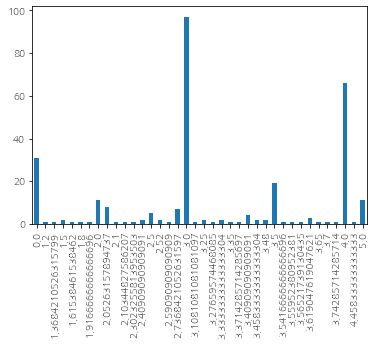

In [0]:
df_train.iloc[:,26].value_counts().sort_index().plot.bar()

# 지하층의 소방설비 성능 유지여부

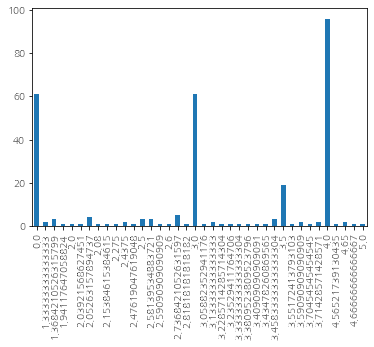

In [0]:
df_train.iloc[:,27].value_counts().sort_index().plot.bar()

# 지하층 피난구, 피난계단의 성능 유지여부

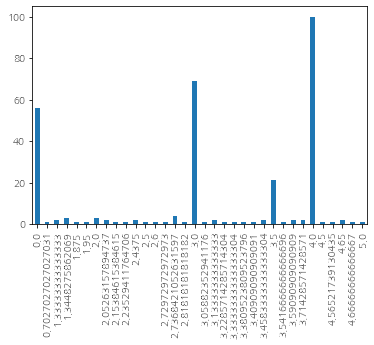

In [0]:
df_train.iloc[:,28].value_counts().sort_index().plot.bar()

# 지적상 지목

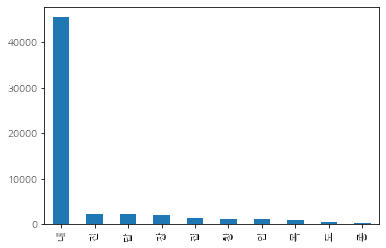

In [0]:
df_train.iloc[:,29].value_counts().head(10).plot.bar()

# 용도지역지구명

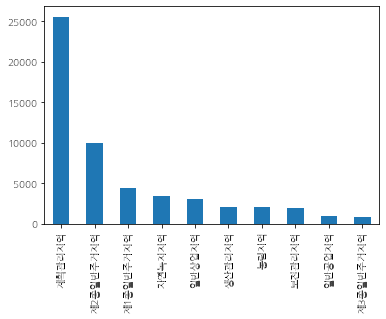

In [0]:
df_train.iloc[:,30].value_counts().head(10).plot.bar()

# 용도지역 지구명2

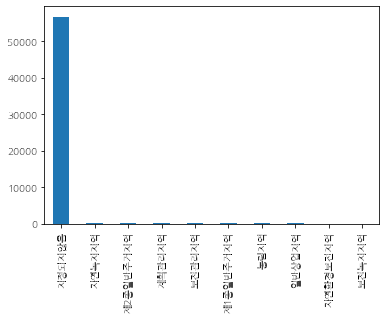

In [0]:
df_train.iloc[:,31].value_counts().head(10).plot.bar()

# 토지이용상황명

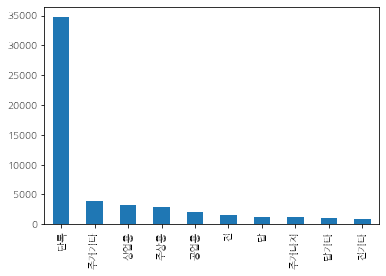

In [0]:
df_train.iloc[:,32].value_counts().head(10).plot.bar()

# 도로측면명

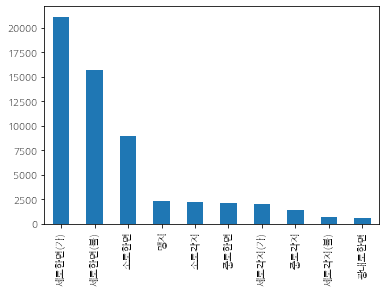

In [0]:
df_train.iloc[:,33].value_counts().head(10).plot.bar()

# 행정구역명

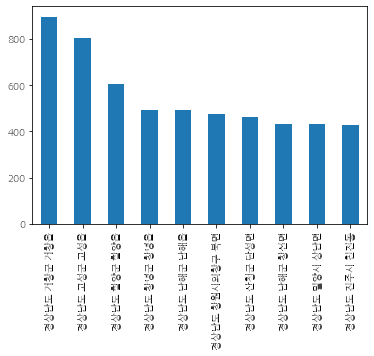

In [0]:
df_train.iloc[:,34].value_counts().head(10).plot.bar()

# 행정구역 인구

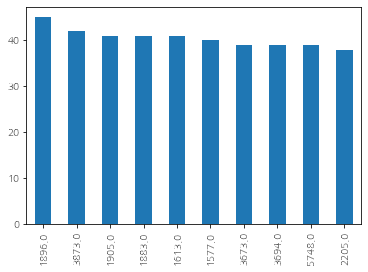

In [0]:
df_train.iloc[:,35].value_counts().head(10).plot.bar()

# 안전센터와의 거리

(array([2.6934e+04, 1.4534e+04, 9.6930e+03, 5.3010e+03, 1.8530e+03,
        6.3000e+02, 1.0100e+02, 3.0000e+01, 1.0900e+02, 1.4000e+01]),
 array([4.0000e+00, 3.8080e+03, 7.6120e+03, 1.1416e+04, 1.5220e+04,
        1.9024e+04, 2.2828e+04, 2.6632e+04, 3.0436e+04, 3.4240e+04,
        3.8044e+04]),
 <a list of 10 Patch objects>)

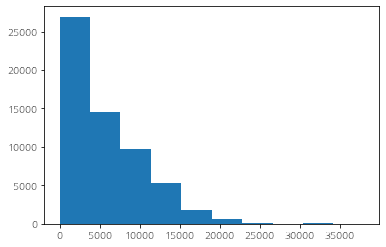

In [0]:
plt.hist(df_train.iloc[:,36])

# 단위 면적당 건물 가격

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([3.5803e+04, 1.3870e+03, 9.4000e+01, 1.5000e+01, 3.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([   17537. ,  1584713.3,  3151889.6,  4719065.9,  6286242.2,
         7853418.5,  9420594.8, 10987771.1, 12554947.4, 14122123.7,
        15689300. ]),
 <a list of 10 Patch objects>)

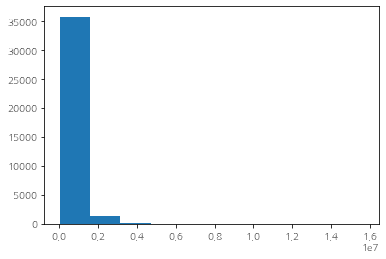

In [0]:
plt.hist(df_train.iloc[:,37])

# 소방용수시설과의 거리

(array([4.0649e+04, 6.7470e+03, 3.6170e+03, 3.3850e+03, 3.2250e+03,
        1.2660e+03, 2.3700e+02, 6.6000e+01, 6.0000e+00, 1.0000e+00]),
 array([    0. ,  1771.6,  3543.2,  5314.8,  7086.4,  8858. , 10629.6,
        12401.2, 14172.8, 15944.4, 17716. ]),
 <a list of 10 Patch objects>)

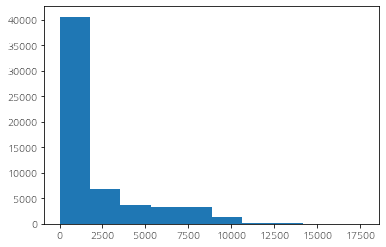

In [0]:
plt.hist(df_train.iloc[:,38])

# 관할 소방서 인원

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 1773.,  8492., 11979.,     0.,  5895.,     0.,  5893., 12748.,
         6007.,  6371.]),
 array([ 85. ,  97.5, 110. , 122.5, 135. , 147.5, 160. , 172.5, 185. ,
        197.5, 210. ]),
 <a list of 10 Patch objects>)

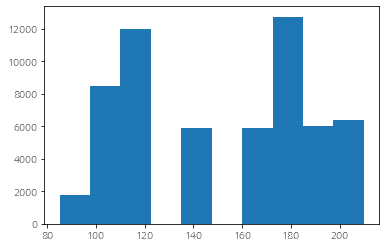

In [0]:
plt.hist(df_train.iloc[:,39])

# 다중이용시설 포함여부

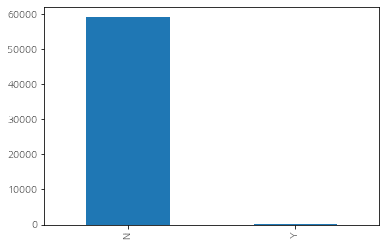

In [0]:
df_train.iloc[:,40].value_counts().head(10).plot.bar()

# 공공CCTV와의 최소거리

(array([49018.,  6753.,  1494.,   548.,   393.,   305.,   225.,   235.,
          140.,    88.]),
 array([    0. ,  1227.8,  2455.6,  3683.4,  4911.2,  6139. ,  7366.8,
         8594.6,  9822.4, 11050.2, 12278. ]),
 <a list of 10 Patch objects>)

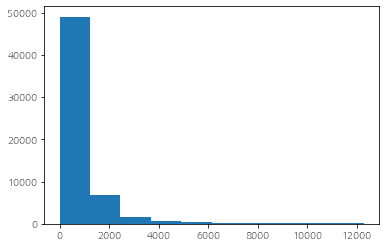

In [0]:
plt.hist(df_train.iloc[:,41])

# 100m 이내 공공CCTV

(array([5.6265e+04, 1.9420e+03, 7.5600e+02, 1.2800e+02, 4.9000e+01,
        3.3000e+01, 9.0000e+00, 1.0000e+01, 3.0000e+00, 4.0000e+00]),
 array([ 0. ,  2.4,  4.8,  7.2,  9.6, 12. , 14.4, 16.8, 19.2, 21.6, 24. ]),
 <a list of 10 Patch objects>)

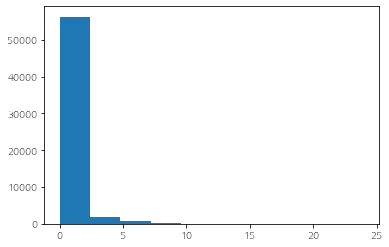

In [0]:
plt.hist(df_train.iloc[:,42])

# 100m 이내 소방용수 시설 수

(array([4.8609e+04, 7.6680e+03, 2.1680e+03, 5.3300e+02, 1.6700e+02,
        3.6000e+01, 1.1000e+01, 5.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

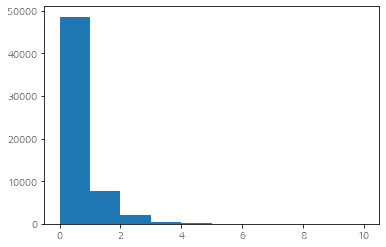

In [0]:
plt.hist(df_train.iloc[:,43])

# 담배 소매점과의 최소거리

(array([3.0530e+04, 1.2399e+04, 8.2870e+03, 3.8090e+03, 2.5610e+03,
        1.0320e+03, 4.2700e+02, 9.9000e+01, 5.4000e+01, 1.0000e+00]),
 array([    0. ,  2322.8,  4645.6,  6968.4,  9291.2, 11614. , 13936.8,
        16259.6, 18582.4, 20905.2, 23228. ]),
 <a list of 10 Patch objects>)

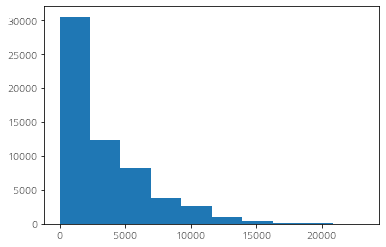

In [0]:
plt.hist(df_train.iloc[:,44])

# 안전 비상벨과의 최소거리

(array([13276., 11247.,  8006.,  9998.,  5057.,  3462.,  2743.,  3451.,
         1414.,   545.]),
 array([5.00000e+00, 1.03616e+04, 2.07182e+04, 3.10748e+04, 4.14314e+04,
        5.17880e+04, 6.21446e+04, 7.25012e+04, 8.28578e+04, 9.32144e+04,
        1.03571e+05]),
 <a list of 10 Patch objects>)

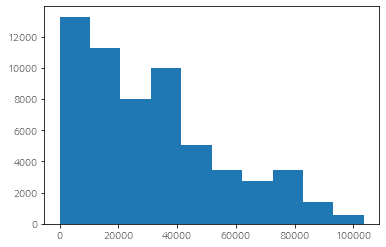

In [0]:
plt.hist(df_train.iloc[:,45])

# 자동 심장 충격기와의 최소 거리

(array([34871.,  6763.,  5167.,  4460.,  3403.,  1405.,  1608.,   656.,
          516.,   350.]),
 array([    0. ,  5648.5, 11297. , 16945.5, 22594. , 28242.5, 33891. ,
        39539.5, 45188. , 50836.5, 56485. ]),
 <a list of 10 Patch objects>)

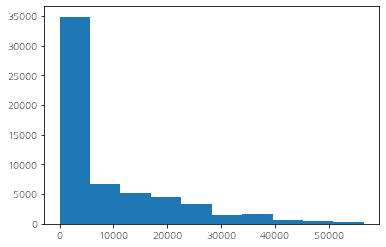

In [0]:
plt.hist(df_train.iloc[:,46])

# 금연구역과의 최소거리

(array([4.5427e+04, 7.6760e+03, 3.3130e+03, 1.5960e+03, 6.5100e+02,
        2.8500e+02, 1.9900e+02, 5.1000e+01, 0.0000e+00, 1.0000e+00]),
 array([    0. ,  1616.4,  3232.8,  4849.2,  6465.6,  8082. ,  9698.4,
        11314.8, 12931.2, 14547.6, 16164. ]),
 <a list of 10 Patch objects>)

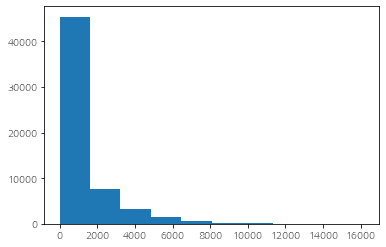

In [0]:
plt.hist(df_train.iloc[:,47])

# 반경 50M 이내의 건물 수

(array([5.0384e+04, 3.8820e+03, 2.5250e+03, 1.2700e+03, 6.3900e+02,
        3.3900e+02, 1.1600e+02, 3.3000e+01, 1.0000e+01, 1.0000e+00]),
 array([ 0. ,  8.4, 16.8, 25.2, 33.6, 42. , 50.4, 58.8, 67.2, 75.6, 84. ]),
 <a list of 10 Patch objects>)

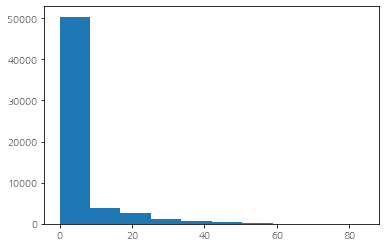

In [0]:
plt.hist(df_train.iloc[:,48])